# Import the reqired libraries

In [6]:
import pandas as pd
import datetime                                        # To handle dates
import calendar                                        # To get month
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics                      # To get regression metrics
import scipy as sp
import time                                            # To do time complexity analysis
import random
import copy
import profile
import cProfile
from sklearn.cluster import KMeans                     # perform clustering operation

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

# Read all data

In [7]:
# Importing stores data
stores_df=pd.read_csv('Data/stores.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [9]:
# Importing train data
train_df=pd.read_csv('Data/train.csv',parse_dates=['Date'])
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
# Importing features data
features_df=pd.read_csv('Data/features.csv',parse_dates=['Date'])
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


## Handling missing values of features dataset

In [13]:
# Checking missing values in store data 
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [15]:
# Checking missing values in train data 
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
# Checking missing values in features data 
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
# Adding the missing values of 0 when there is not MarkDown
features_df["CPI"].fillna(features_df["CPI"].median(),inplace=True)
features_df["Unemployment"].fillna(features_df["Unemployment"].median(),inplace=True)

for i in range(1,6):
  features_df["MarkDown"+str(i)] = features_df["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features_df["MarkDown"+str(i)].fillna(value=0,inplace=True)

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [18]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


## Merging the three different datasets (train, stores, and features)

In [19]:
# Creating the main dataset that merges three different datasets (train, stores, and features) on common columns.

# merges the train and stores datasets on the 'Store' column using a left join (how='left').
data_df = train_df.merge(stores_df, on='Store', how='left')
# merges the resulting dataset with the features dataset on the 'Store' and 'Date' columns using a left join (how='left').
data_df = data_df.merge(features_df, on=['Store', 'Date'], how='left')

# getting rid of repeated column with different name
data_df.drop(columns='IsHoliday_x',inplace=True)
data_df.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)

#The resulting master dataset should contain information about the stores, the dates, and the sales data.
data_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


# Sorting the Dataset

In [20]:
# Sorting the data based on Date
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.sort_values(by=['Date'],inplace=True)
data_df.set_index(data_df.Date, inplace=True)
data_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [21]:
# Adding year, month and week columns by spliting the Date column
data_df['Year'] = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month
data_df['Week'] = data_df['Date'].dt.isocalendar().week

In [22]:
data_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


# Data Visuallizations

In [23]:
# Creating a custom season dictionary to identify the season based on each month
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

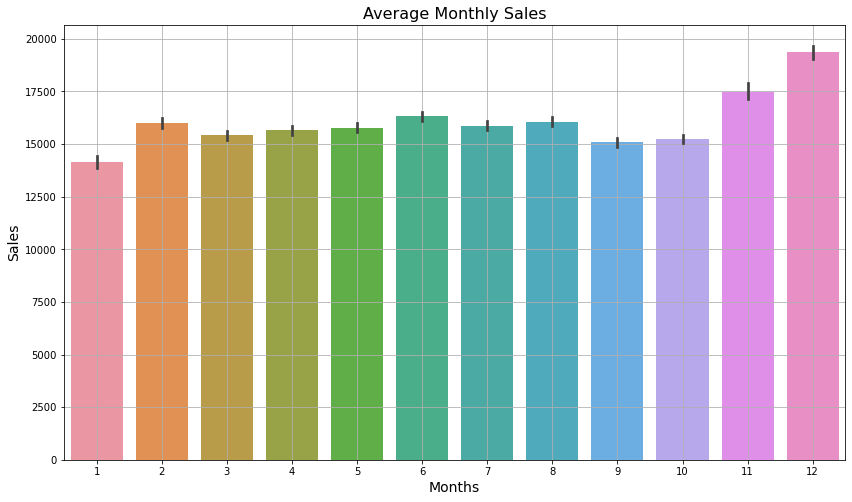

In [18]:
# Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data_df)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('plots/avg_monthly_sales.png') # save copy of image 
plt.grid()

Based on the provided data, Walmart store sales tend to spike the most in November and December, which is expected considering it is the end of the year and there are multiple holidays during that time of the year.

In [24]:
# getting the monthly sales for each month of the years
monthly_sales = pd.crosstab(data_df["Year"], data_df["Month"], values=data_df["Weekly_Sales"],aggfunc='sum')
monthly_sales

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.903330e+08,1.819198e+08,2.314124e+08,1.867109e+08,1.922462e+08,2.325801e+08,1.876401e+08,1.772679e+08,2.171618e+08,2.028534e+08,2.887605e+08
2011,1.637040e+08,1.863313e+08,1.793564e+08,2.265265e+08,1.816482e+08,1.897734e+08,2.299114e+08,1.885993e+08,2.208477e+08,1.832613e+08,2.101624e+08,2.880781e+08
2012,1.688945e+08,1.920636e+08,2.315097e+08,1.889209e+08,1.887665e+08,2.406103e+08,1.875095e+08,2.368508e+08,1.806455e+08,1.843617e+08,NaN,NaN


we notice that the data for January of 2010 and November, December of 2012 are missing from the dataset as it was not provided. 

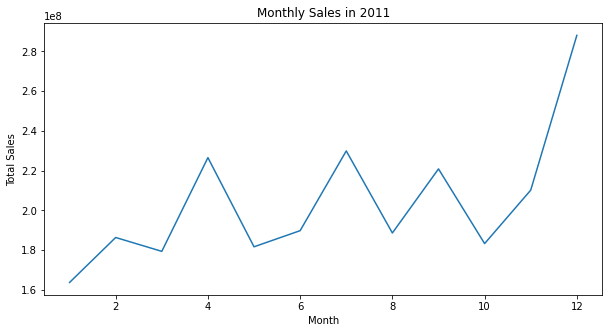

In [20]:
# filter the data for the year 2011
df_2011 = data_df[data_df['Year'] == 2011]

# group the data by month and calculate the total sales for each month
m_sales = df_2011.groupby('Month')['Weekly_Sales'].sum()

# plot the bar graph for the monthly sales
plt.figure(figsize=(10,5))
plt.plot(m_sales.index, m_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales in 2011')
plt.show()

Using only year 2011 data since its the only one not missing anyting, we can be sure that sales on the end of the year spike up compare to other months

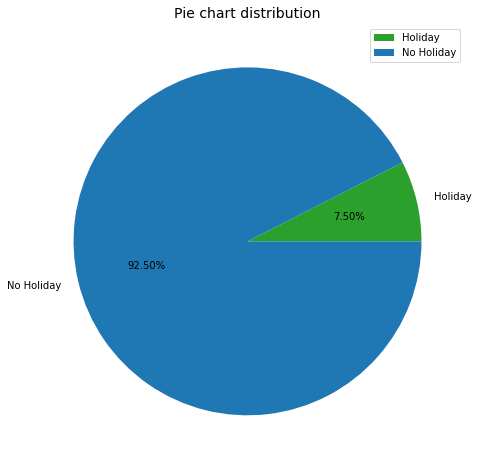

In [21]:
# Holiday Vs non-holiday sales
holiday_sales = data_df.loc[data_df['IsHoliday']==True, 'Weekly_Sales'].sum()
nonholiday_sales = data_df.loc[data_df['IsHoliday']==False, 'Weekly_Sales'].sum()

plt.figure(figsize=(8,8))
plt.pie([holiday_sales, nonholiday_sales], 
        labels=['Holiday','No Holiday'],
        autopct='%0.2f%%',
        colors=['tab:green','tab:blue'])
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('plots/holiday_distribution.png')
plt.show()


The above pie chart show the distribution of weekly sales during holidays and non-holidays days in the dataset. 

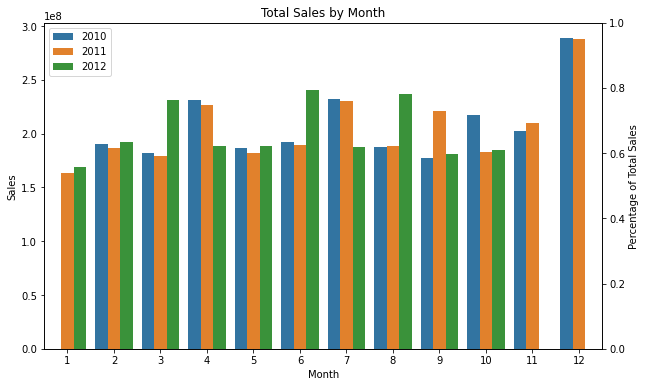

<Figure size 432x288 with 0 Axes>

In [22]:
# Group the data by month and sum the sales
monthly_sales = data_df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Calculate the total sales for each month across all years
monthly_totals = monthly_sales.groupby('Month')['Weekly_Sales'].sum()

# Calculate the percentage of sales for each month
monthly_perc = monthly_totals / monthly_totals.sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales['Month'], y=monthly_sales['Weekly_Sales'], hue=monthly_sales['Year'])
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='upper left')

# Create the secondary axis for the percentage of sales
ax2 = plt.twinx()
# ax2.plot(monthly_perc.index, monthly_perc.values, color='red')
ax2.set_ylabel('Percentage of Total Sales')

plt.show()

# Save the plot to a fil
plt.savefig('plots/monthly_sales_every_year.png')


the graph shows the sales increase/decrease over the years for the same month

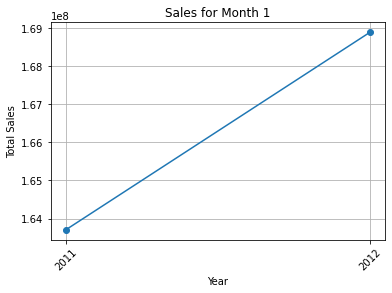

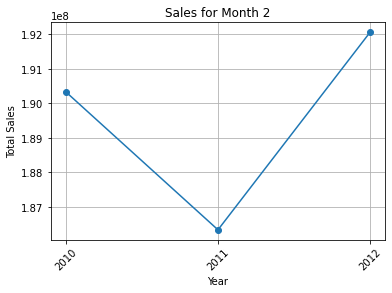

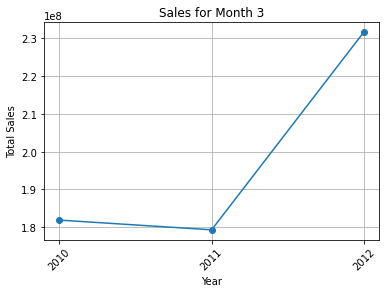

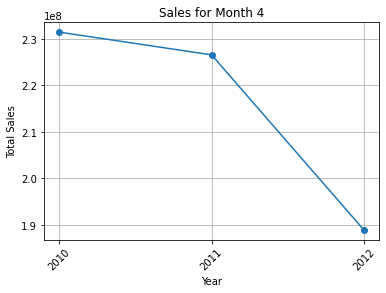

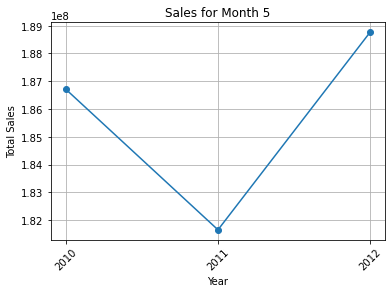

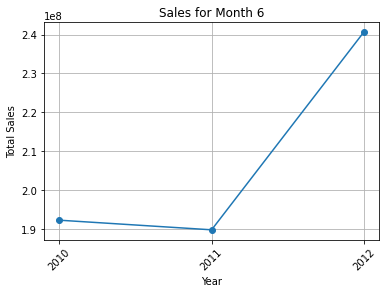

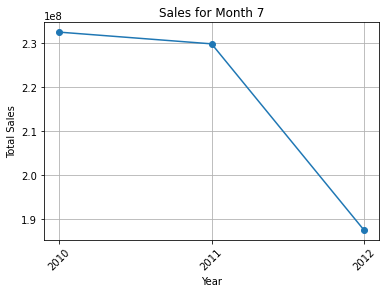

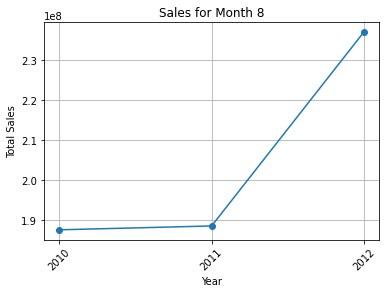

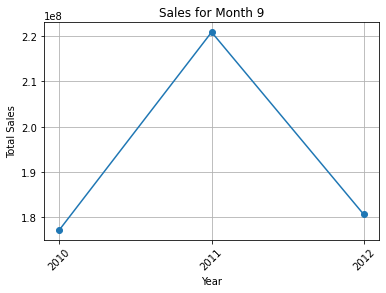

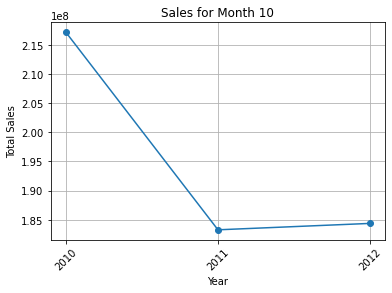

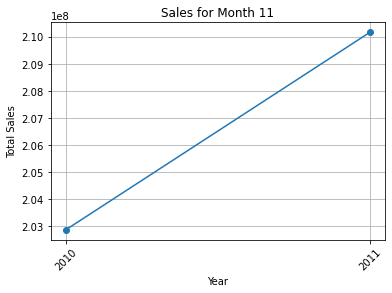

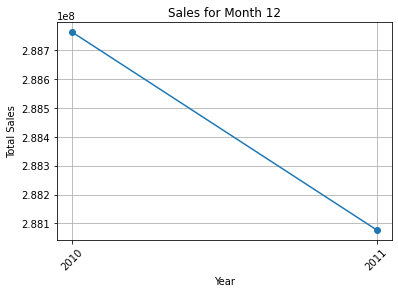

In [23]:
# Group the data by month and year, and sum the weekly sales for each month
month_sales = data_df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Loop through each month and create a line plot
for month in range(1, 13):
    # Get the sales data for the current month
    month_sales_data = month_sales[month_sales['Month'] == month]
    
    # Create a line plot for the sales data
    fig, ax = plt.subplots()
    ax.plot(month_sales_data['Year'], month_sales_data['Weekly_Sales'], marker='o')
    
    # Set the plot title and axis labels
    ax.set_title(f'Sales for Month {month}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Sales')
    
    # Set the x-axis tick labels to only show the years with data
    ax.set_xticks(month_sales_data['Year'])
    
    # Rotate the x-axis tick labels for better visibility
    plt.xticks(rotation=45)
    
    # Add a grid to the plot
    ax.grid()
    
    # Show the plot
    plt.show()
  

the graphs shows the sales increase/decrease over the years for the same month

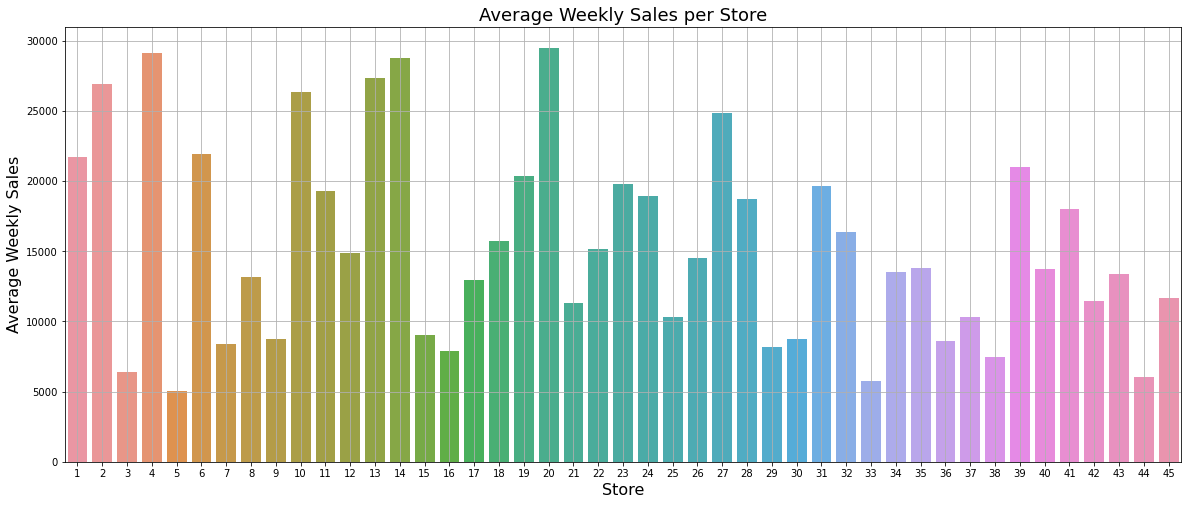

In [41]:
# Calculate average weekly sales for each store
w_avg_sales = data_df.groupby(['Store'])['Weekly_Sales'].mean().reset_index()

# Plot the average sales per store
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Weekly_Sales', data=w_avg_sales)
plt.grid()
plt.title('Average Weekly Sales per Store', fontsize=18)
plt.ylabel('Average Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('plots/avg_weekly_sales_store.png')
plt.show()

This plot indicate which stores out of the 45 had the most sales on average each week

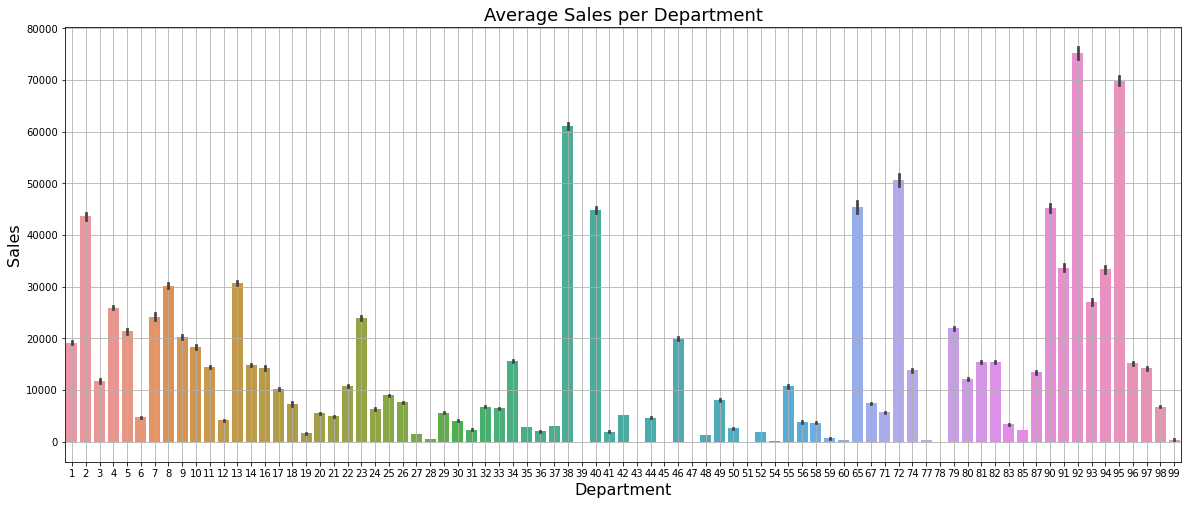

In [25]:
# Plot the average sales per department
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data_df)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.savefig('plots/avg_sales_dept.png')
plt.show()

This plot indicate which departments out of the 99 had the most sales on average each week

## Correlation Analysis

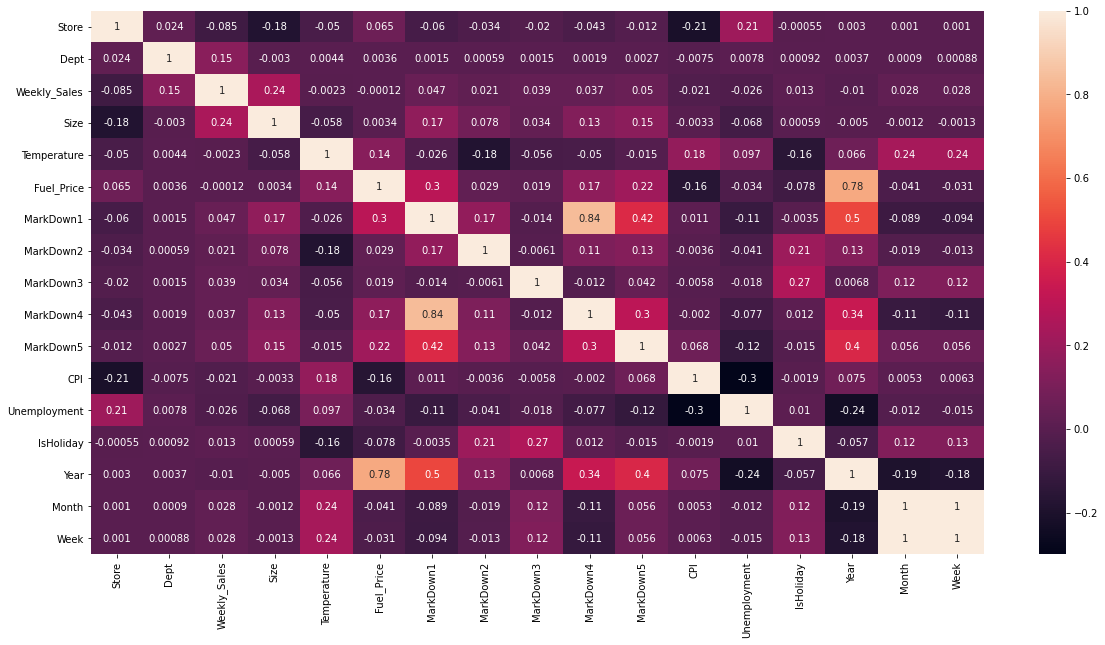

In [27]:
# Correlation
plt.figure(figsize = (20, 10))
sns.heatmap(data_df.corr(), annot = True);

We can notice that there is a positive correlation between the year and the fuel price and betweeen department and weekly sales

# Time Series

For Time Series Anlaysis , we will consider one store from each store type a , b , c that will represent their respective group. It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

<AxesSubplot:xlabel='Date'>

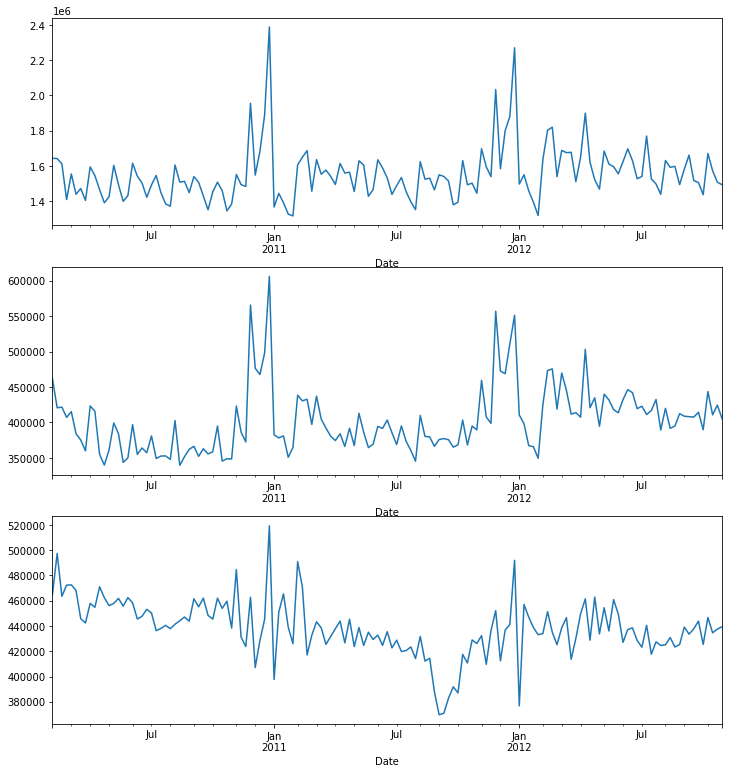

In [122]:
# Convert the date column to a datetime type
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Data Preparation: input should be float type
train_df['Weekly_Sales'] = train_df['Weekly_Sales'] * 1.0

# Assigning one store from each category
sales_a = train_df[train_df.Store == 1].set_index('Date')['Weekly_Sales']
sales_b = train_df[train_df.Store == 3].set_index('Date')['Weekly_Sales']
sales_c = train_df[train_df.Store == 30].set_index('Date')['Weekly_Sales']

f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 13))

# Trend
sales_a.resample('W').sum().plot(ax=ax1)
sales_b.resample('W').sum().plot(ax=ax2)
sales_c.resample('W').sum().plot(ax=ax3)


The plots shown above show that sales for StoreType A, B and C typically peak during the holiday season (Christmas) and then start to drop.

In [43]:
data_df

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False,2012,10,43
2012-10-26,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43


## Calculating max, min, mean, median (Outlier)

In [44]:
# groups the data by 'Store' and 'Dept' columns, then calculates the maximum, minimum, mean, median, and standard deviation 
# of the 'Weekly_Sales' column for each group.
agg_data_df = data_df.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data_df.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [45]:
agg_data_df

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.480,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.850,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.850,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.960,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.420,11330.286495
...,...,...,...,...,...,...,...
3326,45,94,7639.88,0.98,3690.272090,4120.155,1852.287364
3327,45,95,75204.77,41131.42,52896.166643,52417.470,5117.961708
3328,45,96,3.00,2.94,2.970000,2.970,0.042426
3329,45,97,8765.09,4935.60,6466.961888,6470.520,659.739542


In [46]:
# Merge aggregated data with original data
temp_data = pd.merge(left=data_df, right=agg_data_df, on=['Store', 'Dept'], how ='left')
# Drop rows with missing values
temp_data.dropna(inplace=True)
# Replace original data with cleaned data
data_df = temp_data.copy()
# Delete intermediate variable to save memory
del temp_data

# Convert the 'Date' column to datetime format
data_df['Date'] = pd.to_datetime(data_df['Date'])
# Sort the dataframe by 'Date' column
data_df.sort_values(by=['Date'], inplace=True)
# Set 'Date' column as index
data_df.set_index(data_df.Date, inplace=True)
# Show the first five rows of the dataframe
data_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


## One-hot ecoding the sotres types and departments

In [ ]:
# Nymber of stores and departments and their type
data2_col = ['Store','Dept','Type']
data2_df = data_df[data2_col].copy()
     

In [ ]:
data2_df.head()

In [ ]:
# It creates new columns for each unique category in the categorical columns, with binary values (0 or 1) indicating whether a particular row belongs to that category. This process is also known as one-hot encoding. The columns parameter specifies which columns to apply this transformation to.
data2_df = pd.get_dummies(data2_df,columns=data2_col)

# connect the two tables columns of the data
data_df = pd.concat([data_df, data2_df],axis=1)

# delete the extra rows
data_df.drop(columns=data2_col,inplace=True)
data_df.drop(columns=['Date'],inplace=True)

In [ ]:
data_df

# Data Normalization

In [ ]:
# Safe a copy of the master dataset
# data_df.to_csv('./Data/data.csv')

In [48]:
# chenge the type of holiday to be integer or 1 or 0 
data_df['IsHoliday'] = data_df['IsHoliday'].astype('int')

num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'max','min','mean','median','std']

from sklearn.preprocessing import MinMaxScaler

# nomralizating function for the the dataset
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df
     
# Before
data_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [49]:
# Normalize the dataset and store it in nordata_df
nordata_df = normalization(data_df.copy(),num_col)
# After
nordata_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,0.042851,A,0.630267,0.434149,0.0501,0.0,0.0,...,0.405118,0,2010,2,5,0.083127,0.139364,0.123901,0.103718,0.131964
2010-02-05,9,97,2010-02-05,0.008104,B,0.492338,0.392074,0.0501,0.0,0.0,...,0.243052,0,2010,2,5,0.001143,0.035536,0.002678,0.002854,0.003896
2010-02-05,9,85,2010-02-05,0.008141,B,0.492338,0.392074,0.0501,0.0,0.0,...,0.243052,0,2010,2,5,0.003660,0.036396,0.005437,0.005370,0.004117
2010-02-05,8,80,2010-02-05,0.019544,A,0.650636,0.354207,0.0501,0.0,0.0,...,0.231934,0,2010,2,5,0.017335,0.088526,0.050948,0.051669,0.010127
2010-02-05,9,55,2010-02-05,0.023081,B,0.492338,0.392074,0.0501,0.0,0.0,...,0.243052,0,2010,2,5,0.042115,0.069807,0.047762,0.042838,0.051881


In [63]:
# define feature columns
feature_cols = data_df.columns.difference(['Weekly_Sales'])
feature_cols

Index(['CPI', 'Date', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Month', 'Size',
       'Store', 'Temperature', 'Type', 'Unemployment', 'Week', 'Year', 'max',
       'mean', 'median', 'min', 'std'],
      dtype='object')

In [64]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data_df[feature_cols], data_df['Weekly_Sales'])

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float32]

In [65]:
# get ranking of features
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data_df[feature_cols].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data_df[feature_cols].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]
feature_rank

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
x=feature_rank.loc[0:24,['feature']]
x=x['feature'].tolist()
print(x)

In [ ]:
X = data_df[x]
Y = data_df['Weekly_Sales']

In [ ]:
data_df = pd.concat([X,Y],axis=1)
data_df

In [ ]:
data_df.to_csv('./Data/data.csv')

In [ ]:
nordata_df.head()

In [77]:
# nordata_df = nordata_df.drop('Date', axis=1)
# nordata_df = nordata_df.drop('Type', axis=1)
# nordata_df.reset_index(inplace=True)
nordata_df.head()

,level_0,index,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
0,0,0,1,1,0.042851,0.630267,0.434149,0.0501,0.0,0.0,...,0.405118,0,2010,2,5,0.083127,0.139364,0.123901,0.103718,0.131964
1,1,1,9,97,0.008104,0.492338,0.392074,0.0501,0.0,0.0,...,0.243052,0,2010,2,5,0.001143,0.035536,0.002678,0.002854,0.003896
2,2,2,9,85,0.008141,0.492338,0.392074,0.0501,0.0,0.0,...,0.243052,0,2010,2,5,0.003660,0.036396,0.005437,0.005370,0.004117
3,3,3,8,80,0.019544,0.650636,0.354207,0.0501,0.0,0.0,...,0.231934,0,2010,2,5,0.017335,0.088526,0.050948,0.051669,0.010127
4,4,4,9,55,0.023081,0.492338,0.392074,0.0501,0.0,0.0,...,0.243052,0,2010,2,5,0.042115,0.069807,0.047762,0.042838,0.051881


# Data Preparing

In [78]:
# Create X and Y variables for the model
X = nordata_df.drop(['Weekly_Sales'], axis=1)
Y = nordata_df.Weekly_Sales

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Linear Regression Model

In [82]:
# Create a linear regression object and fit the model to the training data
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

lr_acc = lr.score(X_test,y_test)*100
print("Linear Regression Accuracy - ",lr_acc)

y_pred = lr.predict(X_test)
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Square Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R2): " , metrics.explained_variance_score(y_test, y_pred))

Linear Regression Accuracy -  90.91817190867872
Mean Absolute Error:  0.003977225692650983
Root Mean Square Error:  0.009808431241745066
R-squared (R2):  0.909181836452132


In [139]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regression Accuracy - ",lr_acc)

Linear Regression Accuracy -  90.91721914255204


In [80]:
y_pred = lr.predict(X_test)
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R2): " , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error:  0.003977225692650983
Root Mean Square Error:  0.009808431241745066
R-squared (R2):  0.909181836452132


In [93]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('./modelsResult/lr_pred.csv')
lr_df

,Actual,Predicted
Date,,
2012-03-09,0.025777,0.026318
2011-04-29,0.016819,0.015410
2012-08-24,0.012621,0.011155
2011-06-17,0.017606,0.022217
2010-02-05,0.034092,0.026391
...,...,...
2010-04-23,0.026834,0.025282
2012-04-20,0.028328,0.026912
2012-03-02,0.010472,0.012991


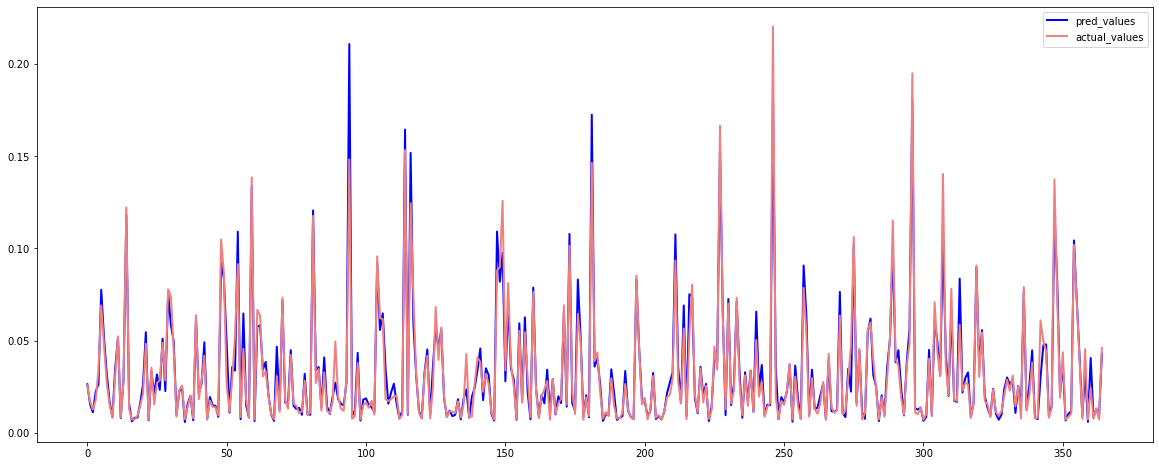

In [94]:
#Graph
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:365]), label="pred_values", linewidth=2.0,color='blue')
plt.plot(y_test[:365].values, label="actual_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/lr_real_pred.png')
plt.show()

## Random Forest Model

In [84]:
# Create a Random forest regression object and fit the model to the training data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Accuracy - ",rf_acc)

y_pred = rf.predict(X_test)
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Square Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R2): " , metrics.explained_variance_score(y_test, y_pred))

Random Forest Accuracy -  96.85627417477062
Mean Absolute Error:  0.0020908007714652873
Root Mean Square Error:  0.005770789658927128
R-squared (R2):  0.9685638642905959


In [49]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [123]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Accuracy - ",rf_acc)

Random Forest Accuracy -  96.97221574723221


In [51]:
y_pred = rf.predict(X_test)


In [63]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R2): " , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error:  0.003977494183767108
Mean Squared Error:  9.621541623491998e-05
Root Mean Square Error:  0.009808945724945162
R-squared (R2):  0.9091723093070765


In [53]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./modelsResult/rf_pred.csv')
rf_df

,Actual,Predicted
Date,,
2012-03-09,0.025777,0.026887
2011-04-29,0.016819,0.017501
2012-08-24,0.012621,0.011654
2011-06-17,0.017606,0.016911
2010-02-05,0.034092,0.028460
...,...,...
2010-04-23,0.026834,0.026970
2012-04-20,0.028328,0.029536
2012-03-02,0.010472,0.012501


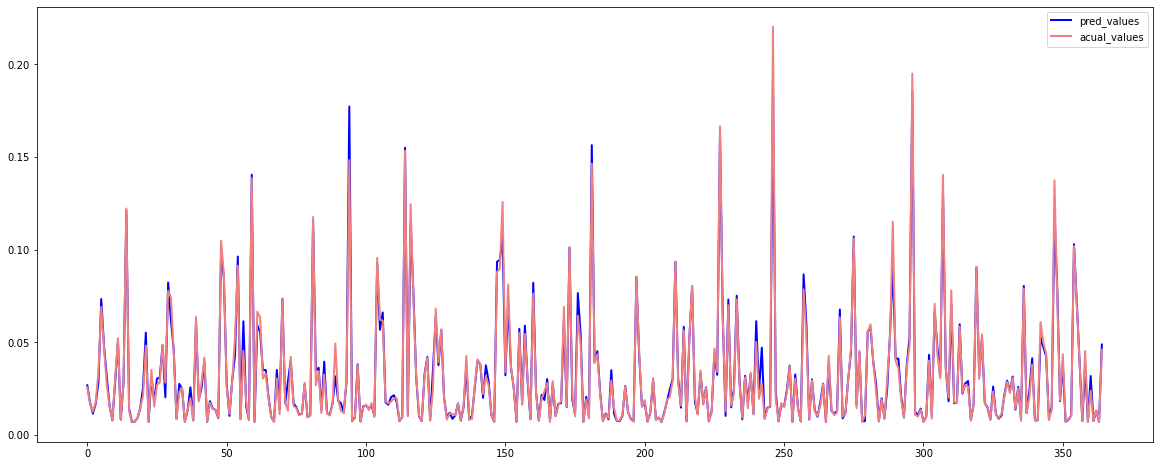

In [69]:
# Graph
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:365]), label="pred_values", linewidth=2.0,color='blue')
plt.plot(y_test[:365].values, label="acual_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/rf_real_pred.png')
plt.show()

## K Neighbors Model

In [86]:
# Create a KNeighborsRegressor object and fit the model to the training data
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Accuracy - ",knn_acc)

y_pred = knn.predict(X_test)
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Square Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R2): " , metrics.explained_variance_score(y_test, y_pred))

KNeigbhbors Accuracy -  -68.76741826693818
Mean Absolute Error:  0.025442164134037135
Root Mean Square Error:  0.04228216502351112
R-squared (R2):  -0.6876488333580801


In [64]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [65]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Accuracy - ",knn_acc)

KNeigbhbors Accuracy -  86.5456138741185


In [66]:
y_pred = knn.predict(X_test)
     
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R2): " , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error:  0.005461940386832508
Mean Squared Error:  0.0001425245617618863
Root Mean Square Error:  0.011938365120982283
R-squared (R2):  0.8654641620100811


In [67]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df

,Actual,Predicted
Date,,
2012-03-09,0.025777,0.019645
2011-04-29,0.016819,0.018162
2012-08-24,0.012621,0.008343
2011-06-17,0.017606,0.017896
2010-02-05,0.034092,0.017572
...,...,...
2010-04-23,0.026834,0.027429
2012-04-20,0.028328,0.031122
2012-03-02,0.010472,0.011253


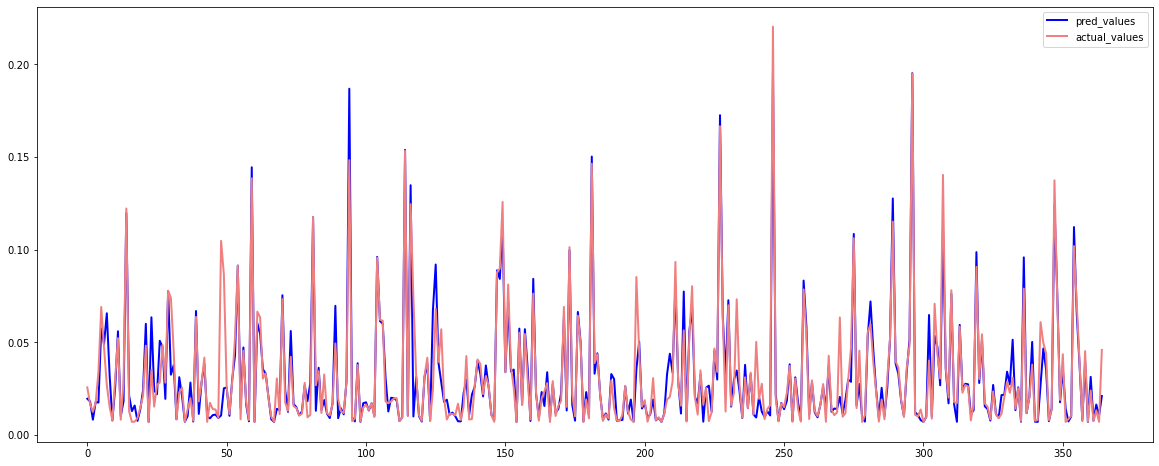

In [68]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:365]), label="pred_values", linewidth=2.0,color='blue')
plt.plot(y_test[:365].values, label="actual_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/knn_real_pred.png')
plt.show()     

# Comparing the results of the modles

In [115]:
# create variables
acc = {'model':['lr_acc','rf_acc','kn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc]}
# make into data frame
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,90.917219
1,rf_acc,96.972216
2,kn_acc,86.545614


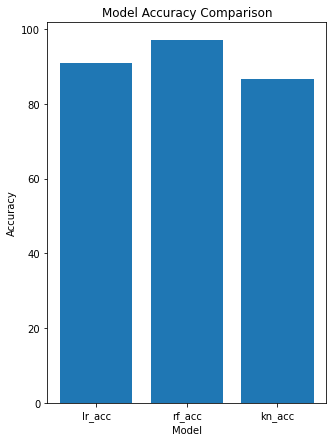

In [116]:
# create bar plot
plt.figure(figsize=(5,7))
plt.bar(acc_df['model'], acc_df['accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [71]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Week: UInt32

In [ ]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

In [ ]:
y_pred = xgbr.predict(X_test)
     
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [ ]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./modelsResult/xgb_pred.csv')
xgb_df